### Librerias

In [20]:
import pandas as pd
import pickle
from busquedas.KNN_HighD import *
from busquedas.KNN_RTree import *
from busquedas.KNN_Sequential import *
import os
import librosa
import numpy as np
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Carga de Datos

In [2]:
batchs_path = 'extractFeatures/batchs/'

In [3]:
def load_features_vectors(bath_folder):
    global_feature_vectors = []

    for file_name in os.listdir(bath_folder):
        if file_name.endswith('.pkl'):
            file_path = os.path.join(bath_folder, file_name)

            with open(file_path, 'rb') as f:
                try:
                    batch_data = pickle.load(f)

                    if isinstance(batch_data, list):
                        for track_id, features_vector in batch_data:
                            global_feature_vectors.append((track_id, features_vector))
                except Exception as e:
                    print(f'Error loading {file_path}: {e}')
    return global_feature_vectors

In [4]:
diccionario_global = load_features_vectors(batchs_path)

dic_1000 = diccionario_global[:1000]
dic_5000 = diccionario_global[:5000]
dic_10000 = diccionario_global[:10000]
dic_20000 = diccionario_global[:20000]
dic_all = diccionario_global

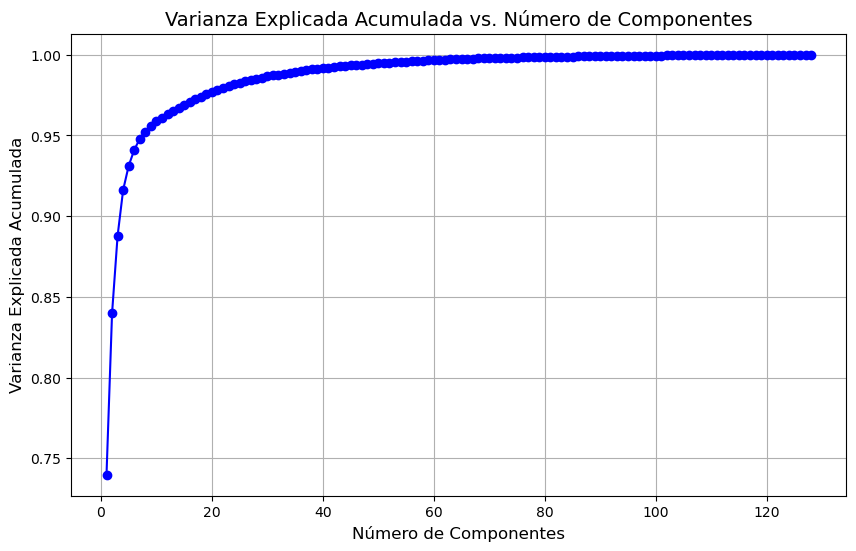

Número de componentes que explican el 98.5% de la varianza: 28


In [41]:
# analisis de la varianza para deducir la cantidad de componentes

# se usara el dic_all, pues es mi diccionario objetivo

features = np.array([features_vector for track_id, features_vector in dic_all])

pca = PCA()
pca.fit(features)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='b')
plt.title('Varianza Explicada Acumulada vs. Número de Componentes', fontsize=14)
plt.xlabel('Número de Componentes', fontsize=12)
plt.ylabel('Varianza Explicada Acumulada', fontsize=12)
plt.grid(True)
plt.show()

n_components_98_5 = np.argmax(explained_variance >= 0.985) + 1
print(f'Número de componentes que explican el 98.5% de la varianza: {n_components_98_5}')

In [42]:
def apply_pca_to_collection(collection, n_components):
    features = np.array([i[1] for i in collection], dtype=np.float32)
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return [(collection[i][0], reduced_features[i]) for i in range(len(collection))]

In [43]:
nro_componentes = n_components_98_5
dic_1000_pca = apply_pca_to_collection(dic_1000, nro_componentes)
dic_5000_pca = apply_pca_to_collection(dic_5000, nro_componentes)
dic_10000_pca = apply_pca_to_collection(dic_10000, nro_componentes)
dic_20000_pca = apply_pca_to_collection(dic_20000, nro_componentes)
dic_all_pca = apply_pca_to_collection(dic_all, nro_componentes)

Se extrae la query de igual manera que se ha extraido los vectores caracteristicos de las canciones.

In [44]:
query_path = 'fma_medium/037/037156.mp3'

y, sr = librosa.load(query_path, sr=None)
mfcc_query_features = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=128)
mfcc_query_features = np.mean(mfcc_query_features.T, axis=0)

In [46]:
features = np.array([i[1] for i in dic_all], dtype=np.float32)

pca = PCA(n_components=nro_componentes)
pca.fit(features) 
mfcc_query_features_pca = pca.transform([mfcc_query_features])[0]

In [47]:
len(mfcc_query_features_pca)

28

Se carga la informacion de las canciones obtenidas de raw_tracks

In [6]:
info_tracks = pd.read_csv('fma_metadata/raw_tracks.csv')

In [7]:
info_tracks.head()

,track_id,album_id,album_title,album_url,artist_id,artist_name,artist_url,artist_website,license_image_file,license_image_file_large,...,track_information,track_instrumental,track_interest,track_language_code,track_listens,track_lyricist,track_number,track_publisher,track_title,track_url
0,2,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,4656,en,1293,NaN,3,NaN,Food,http://freemusicarchive.org/music/AWOL/AWOL_-_...
1,3,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1470,en,514,NaN,4,NaN,Electric Ave,http://freemusicarchive.org/music/AWOL/AWOL_-_...
2,5,1.0,AWOL - A Way Of Life,http://freemusicarchive.org/music/AWOL/AWOL_-_...,1,AWOL,http://freemusicarchive.org/music/AWOL/,http://www.AzillionRecords.blogspot.com,http://i.creativecommons.org/l/by-nc-sa/3.0/us...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,1933,en,1151,NaN,6,NaN,This World,http://freemusicarchive.org/music/AWOL/AWOL_-_...
3,10,6.0,Constant Hitmaker,http://freemusicarchive.org/music/Kurt_Vile/Co...,6,Kurt Vile,http://freemusicarchive.org/music/Kurt_Vile/,http://kurtvile.com,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,54881,en,50135,NaN,1,NaN,Freeway,http://freemusicarchive.org/music/Kurt_Vile/Co...
4,20,4.0,Niris,http://freemusicarchive.org/music/Chris_and_Ni...,4,Nicky Cook,http://freemusicarchive.org/music/Chris_and_Ni...,NaN,http://i.creativecommons.org/l/by-nc-nd/3.0/88...,http://fma-files.s3.amazonaws.com/resources/im...,...,NaN,0,978,en,361,NaN,3,NaN,Spiritual Level,http://freemusicarchive.org/music/Chris_and_Ni...


### Experimentación

#### Para el Knn Sequential y RangeSearch

In [8]:
knn_sequential_1000 = KNN_Sequential(dic_1000)
knn_sequential_5000 = KNN_Sequential(dic_5000)
knn_sequential_10000 = KNN_Sequential(dic_10000)
knn_sequential_20000 = KNN_Sequential(dic_20000)
knn_sequential_all = KNN_Sequential(dic_all)

In [9]:
result_Knn_sequential = {}

knn_sequentials = [knn_sequential_1000, knn_sequential_5000, knn_sequential_10000, knn_sequential_20000, knn_sequential_all]
long_test = [1000, 5000, 10000, 20000, len(dic_all)]
for idx, knn_seq in enumerate(knn_sequentials):
    result = 0
    for _ in range(5):
        start = time.time()
        knn_seq.knn_heap_query(mfcc_query_features, 10)
        end = time.time()
        result += end - start
    result_Knn_sequential[f'knnSeq_{long_test[idx]}'] = result / 5 # promedio en segundos

In [10]:
result_Knn_sequential

{'knnSeq_1000': 0.03279685974121094,
 'knnSeq_5000': 0.18346290588378905,
 'knnSeq_10000': 0.15766143798828125,
 'knnSeq_20000': 0.14463138580322266,
 'knnSeq_24980': 0.15659594535827637}

In [32]:
knn_sequential_1000_pca = KNN_Sequential(dic_1000_pca)
knn_sequential_5000_pca = KNN_Sequential(dic_5000_pca)
knn_sequential_10000_pca = KNN_Sequential(dic_10000_pca)
knn_sequential_20000_pca = KNN_Sequential(dic_20000_pca)
knn_sequential_all_pca = KNN_Sequential(dic_all_pca)

In [49]:
result_Knn_sequential_pca = {}
knn_sequentials_pca = [knn_sequential_1000_pca, knn_sequential_5000_pca, knn_sequential_10000_pca, knn_sequential_20000_pca, knn_sequential_all_pca]

for idx, knn_seq in enumerate(knn_sequentials_pca):
    result = 0
    for _ in range(5):
        start = time.time()
        knn_seq.knn_heap_query(mfcc_query_features_pca, 10)
        end = time.time()
        result += end - start
    result_Knn_sequential_pca[f'knnSeq_{long_test[idx]}_pca'] = result / 5

In [50]:
result_Knn_sequential_pca

{'knnSeq_1000_pca': 0.008814239501953125,
 'knnSeq_5000_pca': 0.02508964538574219,
 'knnSeq_10000_pca': 0.049313926696777345,
 'knnSeq_20000_pca': 0.1015012264251709,
 'knnSeq_24980_pca': 0.13188042640686035}

Analisis de Distribución De la Distancia

In [53]:
def calculate_distances(dic_all, query_features):
    distances = []

    for track_id, features_vector in dic_all:
        dist = np.linalg.norm(features_vector - query_features)  # Distancia Euclidiana
        distances.append(dist)

    return distances

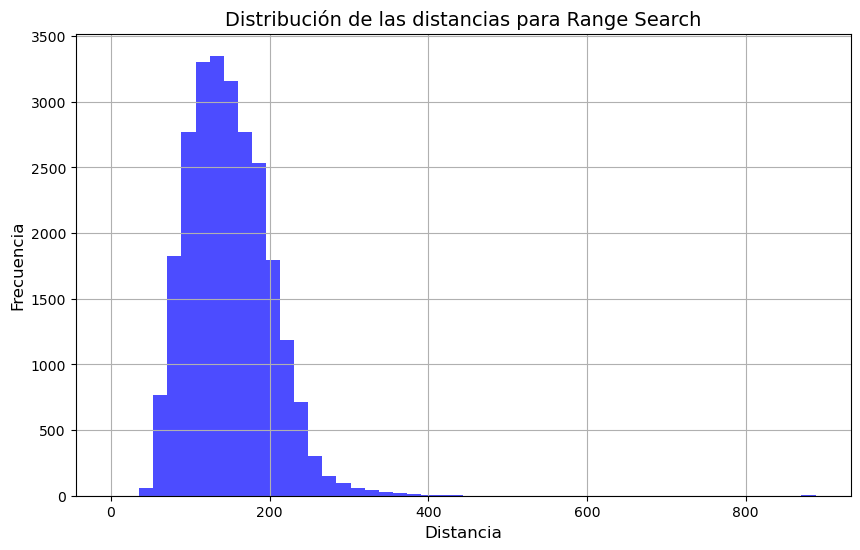

In [52]:
distances = calculate_distances(dic_all, mfcc_query_features)

plt.figure(figsize=(10, 6))
plt.hist(distances, bins=50, color='blue', alpha=0.7)
plt.title('Distribución de las distancias para Range Search', fontsize=14)
plt.xlabel('Distancia', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.show()

In [59]:
r = np.percentile(distances, 90)  # El 90% de las distancias son menores o iguales a este valor
r70 = np.percentile(distances, 70)  # El 70% de las distancias son menores o iguales
r50 = np.percentile(distances, 50)  # El 50% de las distancias son menores o iguales
r30 = np.percentile(distances, 30)  # El 30% de las distancias son menores o iguales
r10 = np.percentile(distances, 10)  # El 10% de las distancias son menores o iguales
print(f"Radio elegido (percentil 90): {r}")
print(f"Radio elegido (percentil 70): {r70}")
print(f"Radio elegido (percentil 50): {r50}")
print(f"Radio elegido (percentil 30): {r30}")
print(f"Radio elegido (percentil 10): {r10}")

Radio elegido (percentil 90): 214.96668701171876
Radio elegido (percentil 70): 173.99943084716796
Radio elegido (percentil 50): 144.3666763305664
Radio elegido (percentil 30): 117.80254287719727
Radio elegido (percentil 10): 87.72541122436523


In [60]:
result_Knn_Range = {}
for idx, knn_seq in enumerate(knn_sequentials):
    result = 0
    for _ in range(5):
        start = time.time()
        knn_seq.range_query(mfcc_query_features, 88)
        end = time.time()
        result += end - start
    result_Knn_Range[f'knnRange_{long_test[idx]}'] = result / 5 # promedio en segundos

In [61]:
print(result_Knn_Range)

{'knnRange_1000': 0.009475183486938477, 'knnRange_5000': 0.029421615600585937, 'knnRange_10000': 0.06416573524475097, 'knnRange_20000': 0.1417080879211426, 'knnRange_24980': 0.16939158439636232}


In [62]:
result_knn_range_pca = {}
for idx, knn_seq in enumerate(knn_sequentials_pca):
    result = 0
    for _ in range(5):
        start = time.time()
        knn_seq.range_query(mfcc_query_features_pca, 88)
        end = time.time()
        result += end - start
    result_knn_range_pca[f'knnRange_{long_test[idx]}_pca'] = result / 5

In [63]:
result_knn_range_pca

{'knnRange_1000_pca': 0.00921473503112793,
 'knnRange_5000_pca': 0.02653470039367676,
 'knnRange_10000_pca': 0.045227336883544925,
 'knnRange_20000_pca': 0.12031493186950684,
 'knnRange_24980_pca': 0.10936288833618164}

#### Para el Knn RTree

1. Se va a experimentar para encontrar un m adecuado

In [13]:
m_values = [10, 30, 50, 70, 100]

time_per_m = {}

for m in m_values:
    knn_rtree = KNN_RTree(m, dic_all)
    start = time.time()
    knn_rtree.query(mfcc_query_features, 10)
    end = time.time()
    time_per_m[f'knnRtree_{m}'] = end - start


In [14]:
time_per_m

{'knnRtree_10': 0.12058019638061523,
 'knnRtree_30': 0.13519978523254395,
 'knnRtree_50': 0.1488335132598877,
 'knnRtree_70': 0.09946703910827637,
 'knnRtree_100': 0.12218928337097168}

In [15]:
almacenamiento_per_node = 50
knn_rtree_1000 = KNN_RTree(almacenamiento_per_node, dic_1000)
knn_rtree_5000 = KNN_RTree(almacenamiento_per_node, dic_5000)
knn_rtree_10000 = KNN_RTree(almacenamiento_per_node, dic_10000)
knn_rtree_20000 = KNN_RTree(almacenamiento_per_node, dic_20000)
knn_rtree_all = KNN_RTree(almacenamiento_per_node, dic_all)

In [16]:
result_knn_rtree = {}
list_knn_rtree = [knn_rtree_1000, knn_rtree_5000, knn_rtree_10000, knn_rtree_20000, knn_rtree_all]
for idx, knn_rtree in enumerate(list_knn_rtree):
    result = 0
    for _ in range(5):
        start = time.time()
        knn_rtree.query(mfcc_query_features, 10)
        end = time.time()
        result += end - start
    result_knn_rtree[f'knnRtree_{long_test[idx]}'] = result / 5

In [17]:
result_knn_rtree

{'knnRtree_1000': 0.0012736797332763671,
 'knnRtree_5000': 0.012182140350341797,
 'knnRtree_10000': 0.02644004821777344,
 'knnRtree_20000': 0.06867008209228516,
 'knnRtree_24980': 0.09344258308410644}

In [64]:
knn_rtree_1000_pca = KNN_RTree(almacenamiento_per_node, dic_1000_pca)
knn_rtree_5000_pca = KNN_RTree(almacenamiento_per_node, dic_5000_pca)
knn_rtree_10000_pca = KNN_RTree(almacenamiento_per_node, dic_10000_pca) 
knn_rtree_20000_pca = KNN_RTree(almacenamiento_per_node, dic_20000_pca)
knn_rtree_all_pca = KNN_RTree(almacenamiento_per_node, dic_all_pca)

In [65]:
result_knn_rtree_pca = {}
list_knn_rtrees_pca = [knn_rtree_1000_pca, knn_rtree_5000_pca, knn_rtree_10000_pca, knn_rtree_20000_pca, knn_rtree_all_pca]
for idx, knn_rtree in enumerate(list_knn_rtrees_pca):
    result = 0
    for _ in range(5):
        start = time.time()
        knn_rtree.query(mfcc_query_features_pca, 10)
        end = time.time()
        result += end - start
    result_knn_rtree_pca[f'knnRtree_{long_test[idx]}_pca'] = result / 5

In [66]:
result_knn_rtree_pca

{'knnRtree_1000_pca': 0.0010638236999511719,
 'knnRtree_5000_pca': 0.003954458236694336,
 'knnRtree_10000_pca': 0.00864710807800293,
 'knnRtree_20000_pca': 0.018291187286376954,
 'knnRtree_24980_pca': 0.022462224960327147}

#### Para el Knn High-D

Se ha hecho en un enviroment aparte.